# Craigslist-Carstrucks-CASE 

This code belongs to Dwilaras Athina
[Check my journeys at dwilarasathina.com](http://dwilarasathina.com/)

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
data1=pd.read_csv('craigslistVehiclesFull.csv')

In [5]:
# Quick looking for the data by the head 
data1.head()

,url,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,...,paint_color,image_url,lat,long,county_fips,county_name,state_fips,state_code,state_name,weather
0,https://marshall.craigslist.org/cto/d/2010-dod...,marshall,11900,2010.0,dodge,challenger se,good,6 cylinders,gas,43600.0,...,red,https://images.craigslist.org/00i0i_2ggH1eKDNK...,43.4775,-96.7041,46083.0,Lincoln,46.0,SD,South Dakota,38.0
1,https://marshall.craigslist.org/cto/d/fleetwoo...,marshall,1515,1999.0,NaN,fleetwood,NaN,NaN,gas,NaN,...,NaN,https://images.craigslist.org/00M0M_irjh7SjEcU...,44.7612,-96.6907,46039.0,Deuel,46.0,SD,South Dakota,38.0
2,https://marshall.craigslist.org/cto/d/2008-for...,marshall,17550,2008.0,ford,f-150,NaN,NaN,gas,NaN,...,NaN,https://images.craigslist.org/00s0s_eL2XFhEUcx...,44.1415,-103.2052,46093.0,Meade,46.0,SD,South Dakota,38.0
3,https://marshall.craigslist.org/cto/d/ford-tau...,marshall,2800,2004.0,ford,taurus,good,6 cylinders,gas,168591.0,...,grey,https://images.craigslist.org/00L0L_5HUR1nQjt8...,43.2845,-95.5930,19143.0,Osceola,19.0,IA,Iowa,47.0
4,https://marshall.craigslist.org/cto/d/2001-gra...,marshall,400,2001.0,NaN,2001 Grand Prix,NaN,NaN,gas,217000.0,...,NaN,https://images.craigslist.org/00n0n_bJJ1XnonSG...,43.0261,-94.4064,19109.0,Kossuth,19.0,IA,Iowa,47.0


In [7]:
# looking for dimension of data
data1.shape

(1723065, 26)

In [9]:
# looking for type of data by column
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1723065 entries, 0 to 1723064
Data columns (total 26 columns):
url             object
city            object
price           int64
year            float64
manufacturer    object
make            object
condition       object
cylinders       object
fuel            object
odometer        float64
title_status    object
transmission    object
vin             object
drive           object
size            object
type            object
paint_color     object
image_url       object
lat             float64
long            float64
county_fips     float64
county_name     object
state_fips      float64
state_code      object
state_name      object
weather         float64
dtypes: float64(7), int64(1), object(18)
memory usage: 341.8+ MB


In [10]:
# drop variables we would'nt use. 

In [29]:
data2=data1.drop(['url', 'vin', 'image_url', 'lat', 'long', 'county_fips','state_fips','weather'  ], axis=1)

In [30]:
#Checking is there any missing value by column? how many?
data2.isnull().sum()

city                  0
price                 0
year               6315
manufacturer     136414
make              69699
condition        700790
cylinders        691291
fuel              10367
odometer         564054
title_status       2554
transmission       9022
drive            661884
size            1123967
type             702931
paint_color      695650
county_name       58833
state_code        58833
state_name            0
dtype: int64

In [6]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1723065 entries, 0 to 1723064
Data columns (total 17 columns):
city            object
price           int64
year            float64
manufacturer    object
make            object
condition       object
cylinders       object
fuel            object
odometer        float64
title_status    object
transmission    object
drive           object
size            object
type            object
paint_color     object
county_fips     float64
state_code      object
dtypes: float64(3), int64(1), object(13)
memory usage: 223.5+ MB


In [31]:
#numerical and categorical split

numerik=['price', 'year', 'odometer']
categorical=data2.drop(numerik,axis=1)
numerical=data2[numerik]
numerical.head()

,price,year,odometer
0,11900,2010.0,43600.0
1,1515,1999.0,NaN
2,17550,2008.0,NaN
3,2800,2004.0,168591.0
4,400,2001.0,217000.0


In [32]:
categorical.head()

,city,manufacturer,make,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,county_name,state_code,state_name
0,marshall,dodge,challenger se,good,6 cylinders,gas,clean,automatic,rwd,NaN,coupe,red,Lincoln,SD,South Dakota
1,marshall,NaN,fleetwood,NaN,NaN,gas,clean,other,NaN,NaN,NaN,NaN,Deuel,SD,South Dakota
2,marshall,ford,f-150,NaN,NaN,gas,clean,automatic,NaN,NaN,NaN,NaN,Meade,SD,South Dakota
3,marshall,ford,taurus,good,6 cylinders,gas,clean,automatic,fwd,full-size,sedan,grey,Osceola,IA,Iowa
4,marshall,NaN,2001 Grand Prix,NaN,NaN,gas,clean,automatic,NaN,NaN,NaN,NaN,Kossuth,IA,Iowa


In [6]:
categorical.isnull().sum()

city                  0
manufacturer     136414
make              69699
condition        700790
cylinders        691291
fuel              10367
title_status       2554
transmission       9022
drive            661884
size            1123967
type             702931
paint_color      695650
state_code        58833
dtype: int64

In [33]:
# Filling missing data
# numerical data fill with the mean
numerical.fillna(numerical.mean(), inplace=True)

C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [34]:
# categorical data fill with the 'defaultfill'
categorical=categorical.fillna('defaultfill')

In [35]:
numerical.isnull().sum()

price       0
year        0
odometer    0
dtype: int64

In [36]:
categorical.isnull().sum()

city            0
manufacturer    0
make            0
condition       0
cylinders       0
fuel            0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
county_name     0
state_code      0
state_name      0
dtype: int64

In [37]:
#merging dataspec and data risk
datacase=pd.concat([numerical, categorical], axis=1)

# looking for average price usedcar for year > 2016 and for year 2019 only

In [16]:
a = datacase[['year', 'price']][datacase.year>2016].mean()['price']
print('average price usedcar for year > 2018 is %.2f' % (a))

average price usedcar for year > 2018 is 88927.10


In [18]:
b = datacase[['year', 'price']][datacase.year==2019].mean()['price']
print('average price usedcar for year 2019 is %.2f' % (b))

average price usedcar for year 2019 is 521124.82


# Grouping data for each County and get the 10 max price 

In [40]:
#choose only 2 features to make computation faster than before
datacountymax=datacase[['county_name','price']].groupby('county_name').max()[['price']]

In [41]:
datacountymax.head()

,price
county_name,
Abbeville,49500
Acadia,150000
Accomack,52000
Ada,152000
Adair,1234567


In [42]:
datacountymax.sort_values(by=['price'], ascending=False).head(10)

,price
county_name,
Lincoln,2068626679
Seminole,2032265964
Fresno,1890015900
York,1736274631
Dallas,1686838383
Douglas,1653252576
Webster,1650087255
Lucas,1601075509
Rankin,1569325056


In [47]:
# delete data used car which year < 2010
newdata=datacase[datacase.year>2009]

In [49]:
newdata.head()

,price,year,odometer,city,manufacturer,make,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,county_name,state_code,state_name
0,11900,2010.0,43600.000000,marshall,dodge,challenger se,good,6 cylinders,gas,clean,automatic,rwd,defaultfill,coupe,red,Lincoln,SD,South Dakota
6,12500,2015.0,39500.000000,marshall,jeep,patriot high altitude,like new,4 cylinders,gas,rebuilt,automatic,4wd,sub-compact,SUV,grey,Minnehaha,SD,South Dakota
8,2700,2018.0,113638.652723,soo,defaultfill,Ebike,excellent,defaultfill,electric,clean,other,defaultfill,mid-size,defaultfill,red,defaultfill,defaultfill,FAILED
12,21695,2016.0,44814.000000,soo,hyundai,sonata,like new,4 cylinders,gas,clean,other,fwd,full-size,sedan,white,defaultfill,defaultfill,FAILED
13,18000,2011.0,113638.652723,soo,chevrolet,camaro,like new,6 cylinders,gas,clean,manual,rwd,full-size,coupe,green,defaultfill,defaultfill,FAILED


In [48]:
newdata.shape

(640867, 18)

In [50]:
#numerik :

newnumerik=['price', 'year', 'odometer']
newcategorical=newdata.drop(newnumerik,axis=1)
newnumerical=data2[newnumerik]

# Analyze from Statistics : Correlation

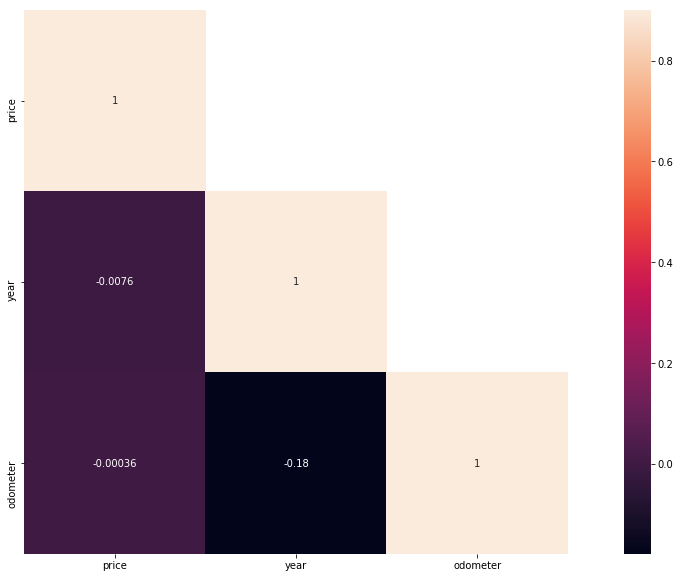

In [51]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
#create correlation with hitmap

#create correlation
corr = newnumerical.corr(method = 'pearson')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(20,10)
sns.heatmap(corr, 
            mask = mask, 
            vmax = 0.9, 
            square = True, 
            annot = True)

# Visualization

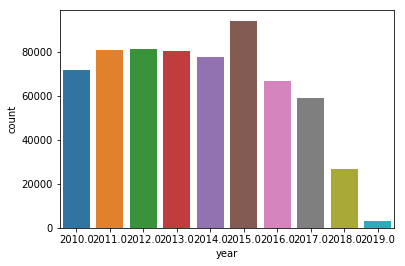

In [55]:

import seaborn as sns

#number of cars each year
sns.countplot(newdata['year'])


In [64]:
car2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94124 entries, 6 to 1723010
Data columns (total 18 columns):
price           94124 non-null int64
year            94124 non-null float64
odometer        94124 non-null float64
city            94124 non-null object
manufacturer    94124 non-null object
make            94124 non-null object
condition       94124 non-null object
cylinders       94124 non-null object
fuel            94124 non-null object
title_status    94124 non-null object
transmission    94124 non-null object
drive           94124 non-null object
size            94124 non-null object
type            94124 non-null object
paint_color     94124 non-null object
county_name     94124 non-null object
state_code      94124 non-null object
state_name      94124 non-null object
dtypes: float64(2), int64(1), object(15)
memory usage: 13.6+ MB


In [79]:
# looking for percentages good condition for 2015 cars

car2015=newdata[(newdata.year==2015)&(newdata.condition!='defaultfill')&(newdata.condition!='salvage')&(newdata.condition!='fair')]
car2015=pd.DataFrame(car2015['condition'].value_counts())
car2015

,condition
excellent,26493
like new,11224
good,9928
new,496


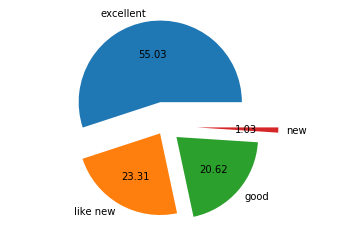

In [80]:
explode = (0.3, 0.1, 0.2, 0.4)

plt.pie(car2015['condition'],labels=car2015.index, autopct='%.2f', explode=explode)

plt.axis('equal')

plt.show()

In [109]:
# let say, there's a company, 
# looking for 
# excellent condition,
# automatic transmission,
# hybrid fuel,
# for 2015 cars 
# in california

carcalifornia=newdata[(newdata.year==2015)&(newdata.condition=='excellent')&(newdata.fuel=='hybrid')&(newdata.transmission=='automatic')&(newdata.state_name=='California')]

In [110]:
carcalifornia.shape

(82, 18)

In [116]:
carcalifornia.head(15)

,price,year,odometer,city,manufacturer,make,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,county_name,state_code,state_name
140874,13995,2015.0,100303.000000,sacramento,toyota,prius,excellent,4 cylinders,hybrid,clean,automatic,defaultfill,defaultfill,sedan,silver,Sacramento,CA,California
335616,19997,2015.0,113638.652723,orangecounty,lexus,ct 200h hybrid,excellent,defaultfill,hybrid,clean,automatic,defaultfill,defaultfill,defaultfill,white,Orange,CA,California
607516,15900,2015.0,47000.000000,slo,toyota,prius hybrid,excellent,4 cylinders,hybrid,clean,automatic,fwd,defaultfill,defaultfill,white,Butte,CA,California
615259,19999,2015.0,41000.000000,sacramento,lexus,ct200h,excellent,defaultfill,hybrid,salvage,automatic,defaultfill,defaultfill,defaultfill,white,Yolo,CA,California
615790,14250,2015.0,56555.000000,sacramento,toyota,prius,excellent,defaultfill,hybrid,salvage,automatic,defaultfill,compact,defaultfill,white,Sacramento,CA,California
616403,11000,2015.0,120000.000000,santabarbara,toyota,prius 2015,excellent,4 cylinders,hybrid,clean,automatic,4wd,compact,hatchback,grey,Santa Barbara,CA,California
616886,13500,2015.0,124000.000000,santabarbara,toyota,prius,excellent,4 cylinders,hybrid,clean,automatic,fwd,compact,coupe,silver,Santa Barbara,CA,California
621961,13995,2015.0,45250.000000,sfbay,hyundai,sonata hybrid,excellent,defaultfill,hybrid,clean,automatic,fwd,mid-size,sedan,defaultfill,Alameda,CA,California
621991,9999,2015.0,113638.652723,sfbay,toyota,prius,excellent,defaultfill,hybrid,clean,automatic,defaultfill,defaultfill,defaultfill,defaultfill,Santa Clara,CA,California
624114,17283,2015.0,42576.000000,inlandempire,ford,c-max energi,excellent,4 cylinders,hybrid,clean,automatic,fwd,compact,wagon,grey,Riverside,CA,California


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text xticklabel objects>)

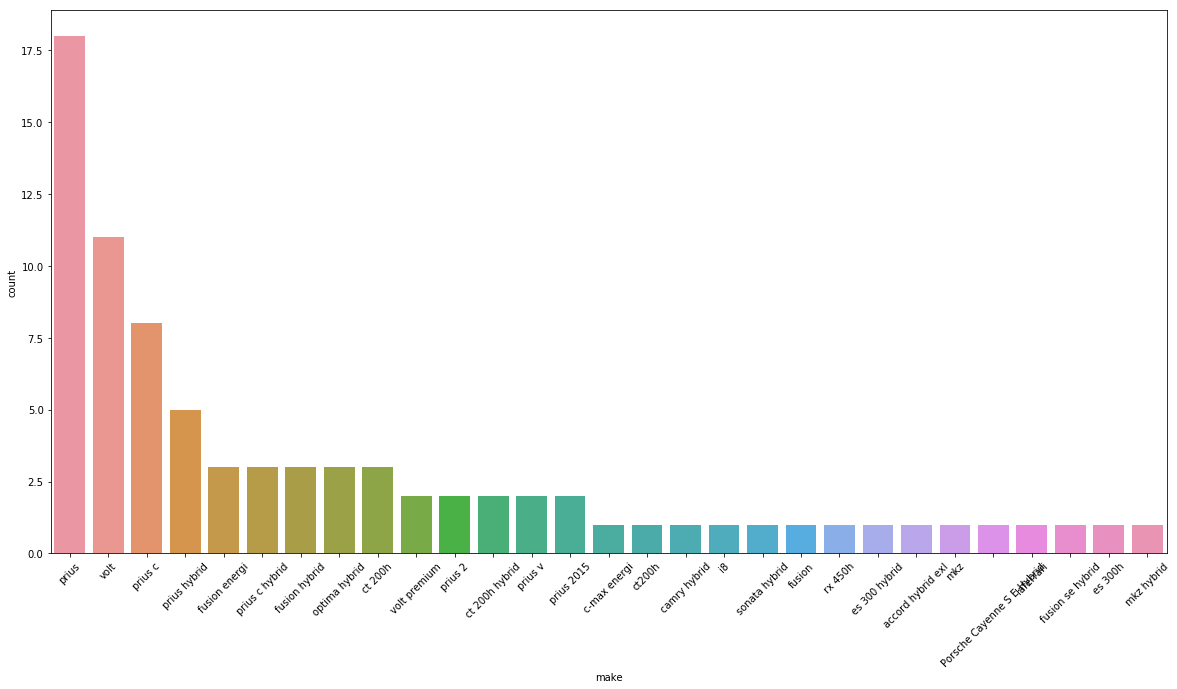

In [115]:
plt.figure(figsize=(20,10))

sns.countplot(carcalifornia['make'],order=carcalifornia['make'].value_counts().index)
plt.xticks(rotation=45)

In [128]:
# the boss said, 
# i want to buy the cars which price is less than USD 15000, but odometer is less than 100.000

carcaliforniaboss=carcalifornia[(carcalifornia.price<15000)&(carcalifornia.odometer<100000)]
carcaliforniaboss

,price,year,odometer,city,manufacturer,make,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,county_name,state_code,state_name
615790,14250,2015.0,56555.0,sacramento,toyota,prius,excellent,defaultfill,hybrid,salvage,automatic,defaultfill,compact,defaultfill,white,Sacramento,CA,California
621961,13995,2015.0,45250.0,sfbay,hyundai,sonata hybrid,excellent,defaultfill,hybrid,clean,automatic,fwd,mid-size,sedan,defaultfill,Alameda,CA,California
629884,10700,2015.0,66000.0,losangeles,toyota,prius c,excellent,4 cylinders,hybrid,clean,automatic,fwd,compact,hatchback,silver,San Bernardino,CA,California
629886,10700,2015.0,66000.0,losangeles,toyota,prius c hybrid,excellent,4 cylinders,hybrid,clean,automatic,fwd,compact,hatchback,silver,San Bernardino,CA,California
633083,13999,2015.0,80000.0,stockton,ford,fusion energi,excellent,other,hybrid,clean,automatic,fwd,defaultfill,sedan,white,Sacramento,CA,California
641577,14345,2015.0,33752.0,goldcountry,chevrolet,volt,excellent,4 cylinders,hybrid,clean,automatic,fwd,compact,sedan,defaultfill,Placer,CA,California
645166,14900,2015.0,47000.0,redding,toyota,prius,excellent,4 cylinders,hybrid,clean,automatic,fwd,defaultfill,defaultfill,white,Butte,CA,California
645323,8800,2015.0,71125.0,redding,toyota,prius c,excellent,4 cylinders,hybrid,salvage,automatic,fwd,mid-size,sedan,green,Sacramento,CA,California
658242,12000,2015.0,27800.0,sfbay,toyota,prius,excellent,4 cylinders,hybrid,salvage,automatic,fwd,compact,defaultfill,white,San Francisco,CA,California
662718,14750,2015.0,28000.0,sandiego,chevrolet,volt,excellent,4 cylinders,hybrid,clean,automatic,fwd,compact,hatchback,grey,San Diego,CA,California


In [129]:
carcaliforniaboss['city'].value_counts()

stockton        9
sfbay           6
sacramento      4
chico           4
sandiego        3
redding         3
losangeles      2
ventura         1
orangecounty    1
modesto         1
inlandempire    1
bakersfield     1
goldcountry     1
Name: city, dtype: int64

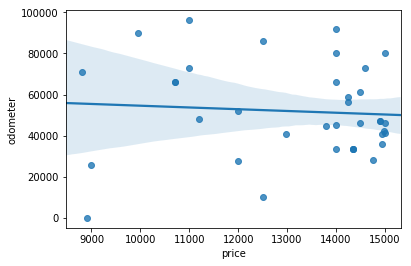

In [131]:
#right now, we can search distribution of the car price and the odometer
sns.regplot(carcaliforniaboss['price'],carcaliforniaboss['odometer'],fit_reg=True)

summary : <br>
We can give a solution for the boss company, <br>
to choose the cars in its best price and the minimum odometer

Let say Toyota want to know, <br>
how many Toyota's used cars in 2015 - 2019 ?

In [134]:
newdata['manufacturer'].value_counts()

ford               112513
chevrolet           81963
toyota              45245
nissan              41008
defaultfill         31584
jeep                30708
dodge               30624
honda               29205
ram                 28715
gmc                 27493
hyundai             21081
kia                 17478
bmw                 16548
volkswagen          15942
subaru              13977
chrysler            11817
mercedes-benz        9809
mazda                8875
cadillac             7958
chevy                7512
buick                7039
audi                 6458
lexus                6325
infiniti             4652
acura                4649
mitsubishi           3578
lincoln              3465
mini                 3032
volvo                2471
rover                2442
fiat                 1749
mercedes             1567
vw                   1045
jaguar                837
mercury               563
pontiac               228
harley-davidson       181
chev                  107
infinity    

In [140]:
toyota=newdata[(newdata.year>2015)&(newdata.manufacturer=='toyota')&(newdata.make!='defaultfill')]
toyota.shape

(12088, 18)

For Camry and Corolla type, describe the data

In [143]:
toyota=toyota[(toyota.make=='camry')|(toyota.make=='corolla')]
toyota.shape

(2473, 18)

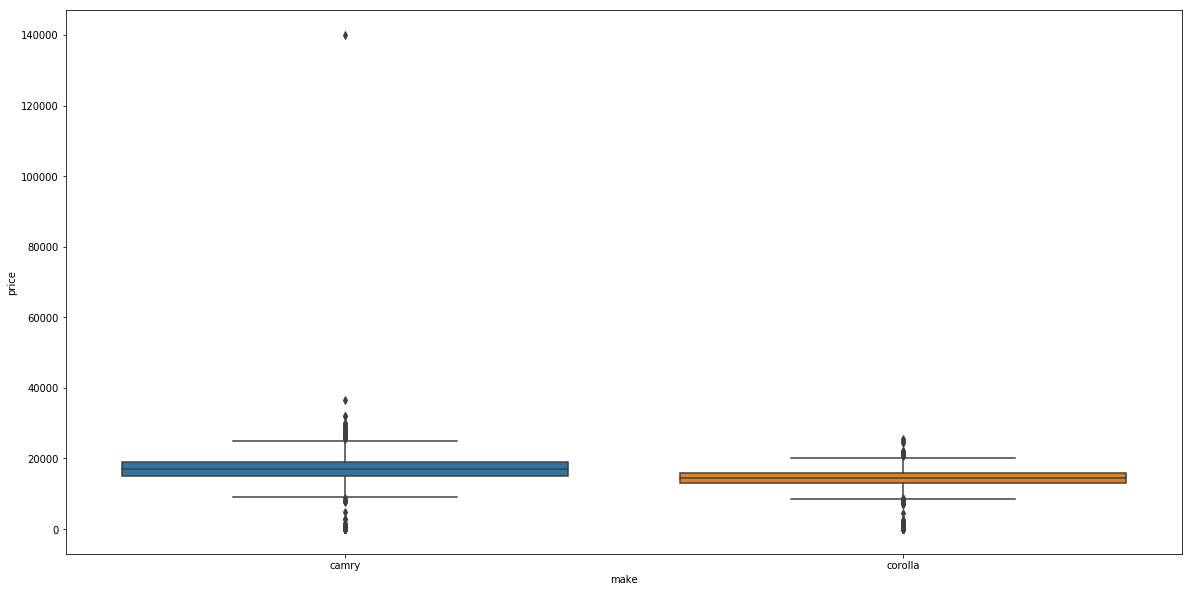

In [145]:
plt.figure(figsize=(20,10))
sns.boxplot(y=toyota["price"], x=toyota['make'])

In [146]:
# find the outlier which have max price 
toyota['price'].max()

140000

In [150]:
toyota=toyota[(toyota.price!=140000)]
toyota['price'].max()

36500

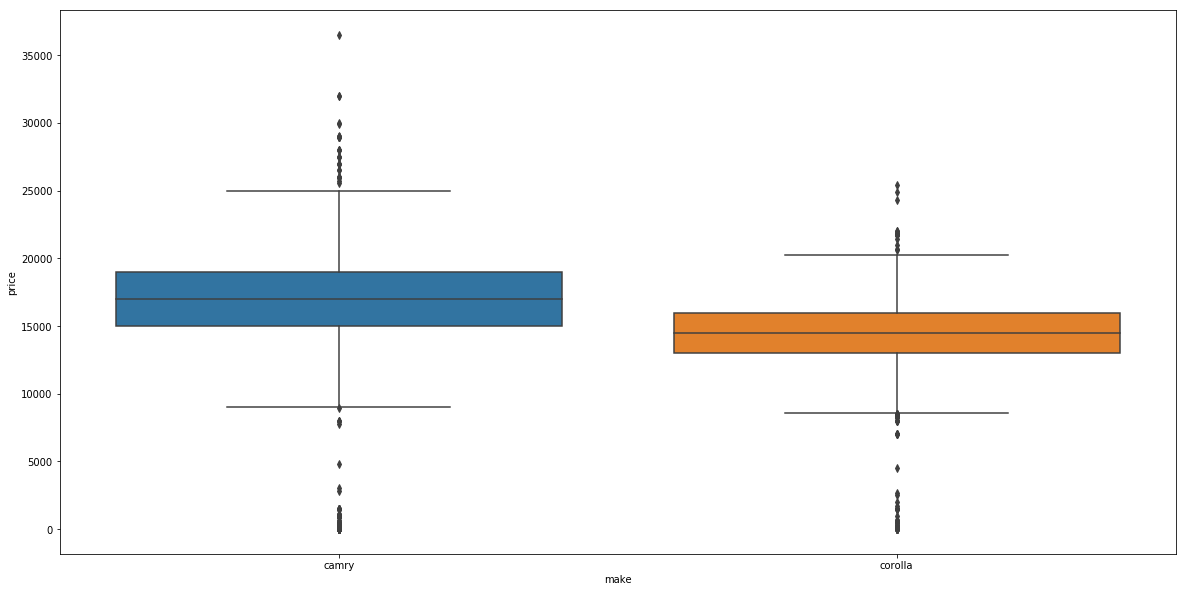

In [151]:
plt.figure(figsize=(20,10))
sns.boxplot(y=toyota["price"], x=toyota['make'])

In [154]:
camry=toyota[toyota.make=='camry']
corolla=toyota[toyota.make=='corolla']

In [155]:
camry.describe()

,price,year,odometer
count,1237.000000,1237.000000,1237.000000
mean,16400.123686,2016.810024,45800.913068
std,5563.779867,0.774991,30881.577964
min,1.000000,2016.000000,98.000000
25%,14995.000000,2016.000000,24143.000000
50%,16995.000000,2017.000000,40901.000000
75%,18999.000000,2017.000000,55621.000000
max,36500.000000,2019.000000,149156.000000


In [157]:
corolla.describe()

,price,year,odometer
count,1230.000000,1230.000000,1230.000000
mean,14057.821951,2016.564228,42047.312923
std,3699.208321,0.704759,31173.330220
min,1.000000,2016.000000,0.000000
25%,12996.000000,2016.000000,21052.000000
50%,14500.000000,2016.000000,35697.000000
75%,15990.000000,2017.000000,50297.750000
max,25400.000000,2019.000000,159000.000000


After we know about the mean price each type, we want to know the number of cars

In [160]:
# Number of camry and corolla cars which the price large than its mean
nncamry=camry[camry.price>16995].sort_values(by='price')
nncorolla=corolla[corolla.price>14500].sort_values(by='price')

In [226]:
nncamry=camry[camry.county_name!='defaultfill']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

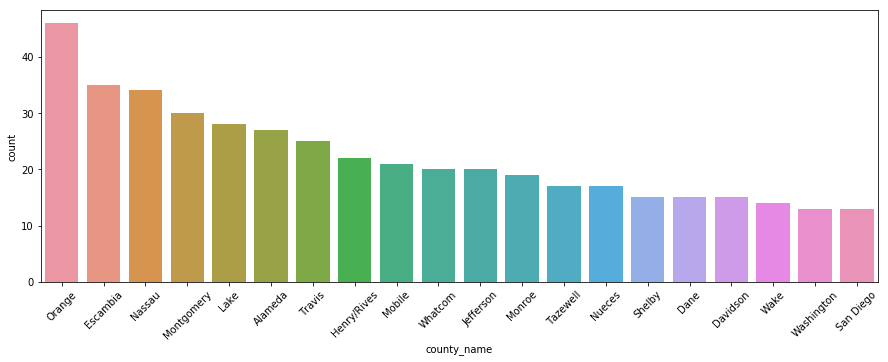

In [232]:
plt.figure(figsize=(15,5))
sns.countplot(nncamry['county_name'], order=nncamry['county_name'].value_counts().index[:20])
plt.xticks(rotation=45)

In [235]:
nncorolla=corolla[corolla.county_name!='defaultfill']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

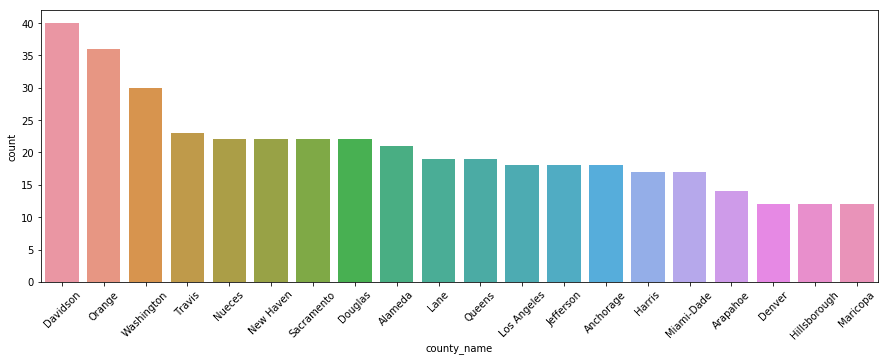

In [236]:
plt.figure(figsize=(15,5))
sns.countplot(nncorolla['county_name'], order=nncorolla['county_name'].value_counts().index[:20])
plt.xticks(rotation=45)